In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

(20.0, 100.0)

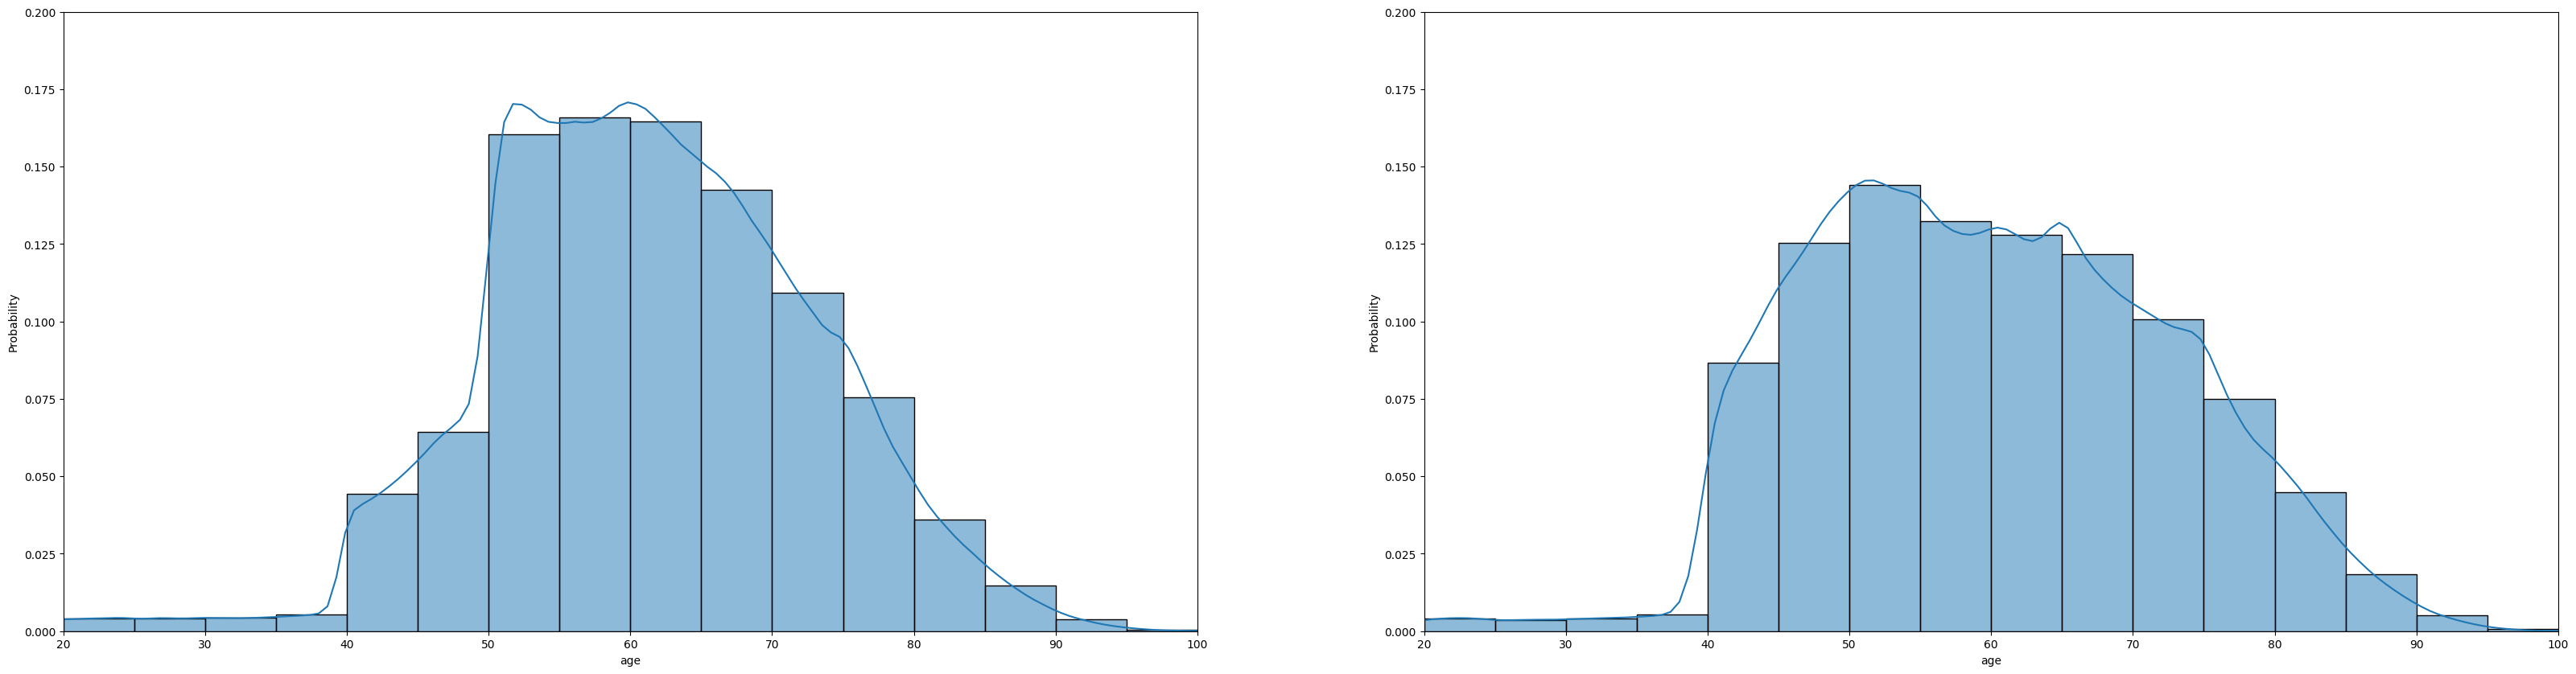

In [2]:
au_data = pd.read_csv('/Users/mcab8311/Documents/HEIDI/AU_screeners_data.csv')
nz_data = pd.read_csv('/Users/mcab8311/Documents/HEIDI/NZ_screeners_data.csv')

au_ages = au_data.assign(
    age=pd.to_numeric(au_data['testDateTime'].str[-4:]) - pd.to_numeric(au_data['birthday']).to_numpy()
)
nz_ages = nz_data.assign(
    age=pd.to_numeric(nz_data['testDateTime'].str[-4:]) - pd.to_numeric(nz_data['birthday']).to_numpy()
)

plt.figure(figsize=(40, 10))
plt.subplot(1, 2, 1)
sn.histplot(data=au_ages, x='age', kde=True, stat='probability', binwidth=5, binrange=[20, 100])
plt.ylim([0, 0.20])
plt.xlim([20, 100])
plt.subplot(1, 2, 2)
sn.histplot(data=nz_ages, x='age', kde=True, stat='probability', binwidth=5, binrange=[20, 100])
plt.ylim([0, 0.20])
plt.xlim([20, 100])

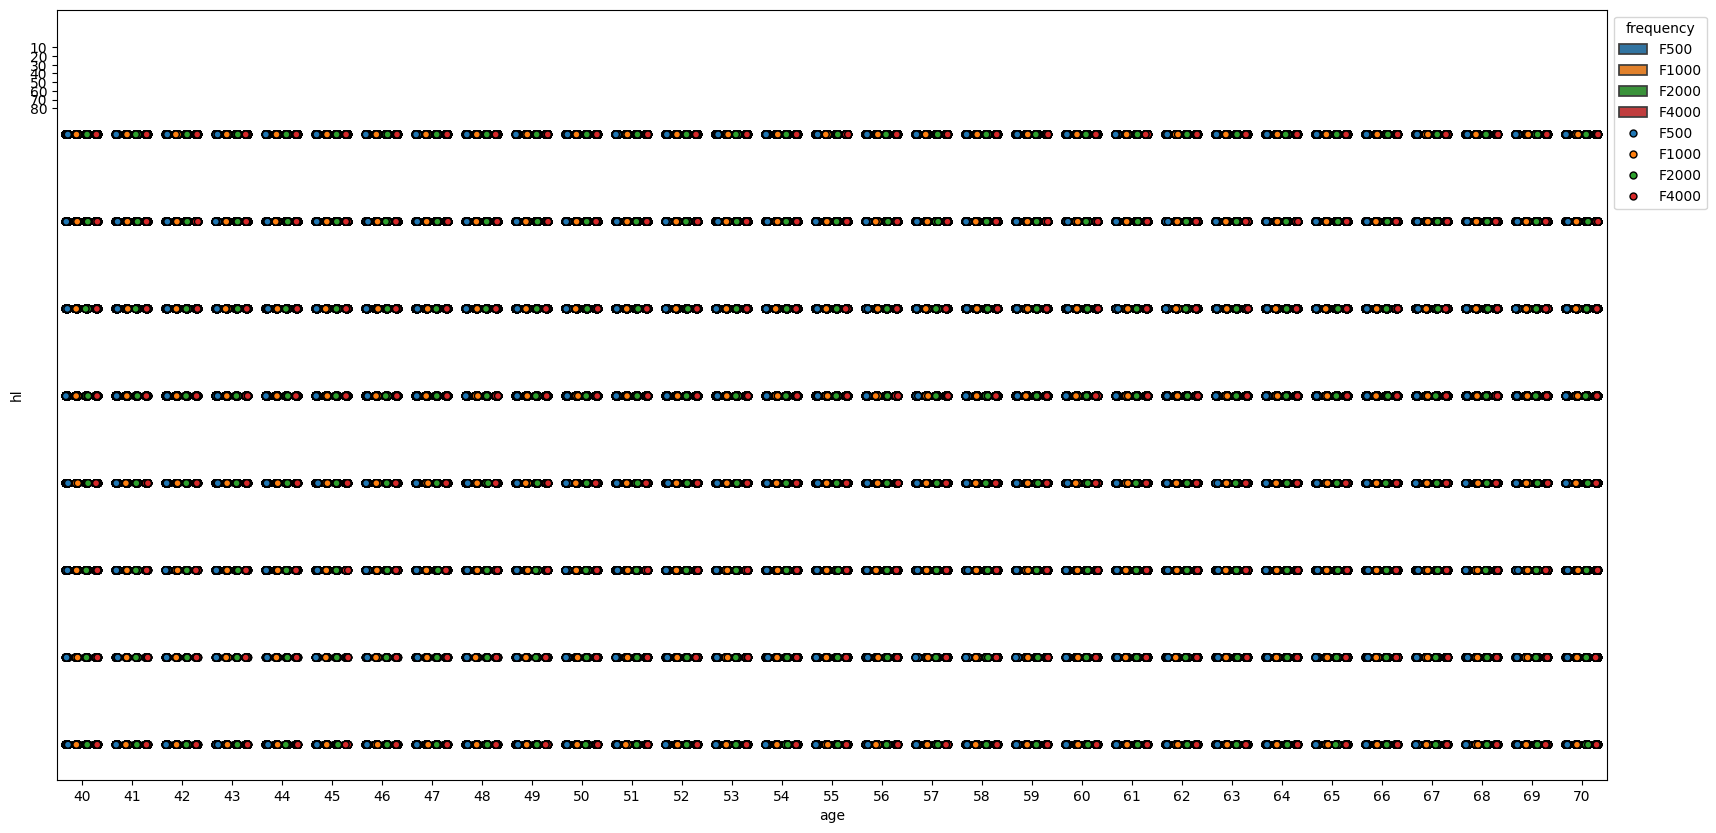

In [67]:
au_ages_worse = au_data.assign(
    age=pd.to_numeric(au_data['testDateTime'].str[-4:]) - pd.to_numeric(au_data['birthday']).to_numpy()
)

mean_left = (au_ages_worse['hlLeft.freq500'] + au_ages_worse['hlLeft.freq1000'] + au_ages_worse['hlLeft.freq2000'] + au_ages_worse['hlLeft.freq4000']) / 4
mean_right = (au_ages_worse['hlRight.freq500'] + au_ages_worse['hlRight.freq1000'] + au_ages_worse['hlRight.freq2000'] + au_ages_worse['hlRight.freq4000']) / 4

au_right_worse = au_ages_worse[mean_left < mean_right]
drop_left = au_right_worse.columns.drop(list(au_right_worse.filter(regex='hlLeft')))
au_right = au_right_worse[drop_left].rename(
    columns={
        'hlRight.freq500': 'F500',
        'hlRight.freq1000': 'F1000',
        'hlRight.freq2000': 'F2000',
        'hlRight.freq4000': 'F4000'
    }
).assign(ear='right')

au_left_worse = au_ages_worse[mean_left >= mean_right]
drop_right = au_left_worse.columns.drop(list(au_right_worse.filter(regex='hlRight')))
au_left = au_left_worse[drop_right].rename(
    columns={
        'hlLeft.freq500': 'F500',
        'hlLeft.freq1000': 'F1000',
        'hlLeft.freq2000': 'F2000',
        'hlLeft.freq4000': 'F4000'
    }
).assign(ear='left')

au_worse = pd.concat([au_right, au_left], ignore_index=True).melt(
   id_vars=['testDateTime', 'birthday', 'age', 'ear'],
   value_vars=[
       'F500', 'F1000', 'F2000', 'F4000',
   ],
   var_name='frequency',
   value_name='hl'
)

# plt.figure()
# ax = sn.kdeplot(data=au_worse, x='age', y='hl', hue='frequency', alpha=.5, fill=True)
# sn.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))

au_worse_old = au_worse[(au_worse['age'] >= 40) & (au_worse['age'] <= 70)]

plt.figure(figsize=(20, 10))
ax1 = sn.violinplot(data=au_worse_old, x='age', y='hl', hue='frequency', orient='h')
for violin in ax1.collections[::2]:
  violin.set_alpha(0.5)
ax2 = sn.stripplot(
    data=au_worse_old, x='age', y='hl', hue='frequency',
    edgecolor='black', size=5, dodge=True, jitter=True,
    linewidth=1, ax=ax1, zorder=0
)

sn.move_legend(ax2, 'upper left', bbox_to_anchor=(1, 1))

In [43]:
print(sorted(au_ages['age'].unique()), sorted(au_right_ages['score'].unique()), sorted(au_left_ages['score'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 117, 118, 120, 121, 122, 123, 124] [10, 20, 30, 40, 50, 60, 70, 80] [10, 20, 30, 40, 50, 60, 70, 80]


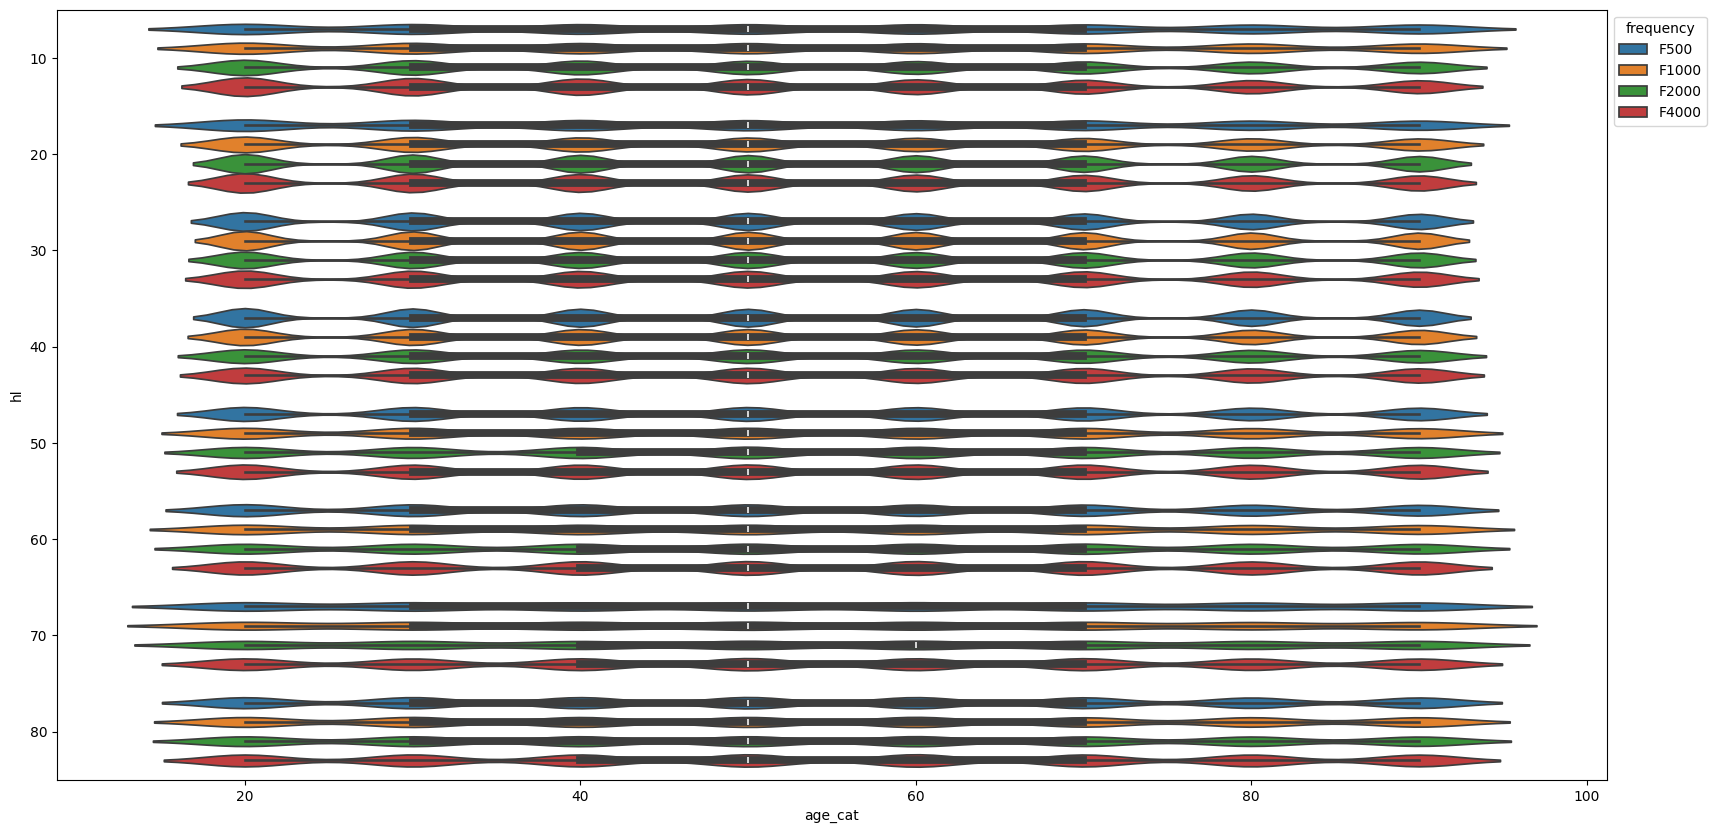

In [62]:
# au_worse.assign(age_cat=((au_worse['age'] % 10) * 10).astype(int))
au_cat_age = au_worse.assign(age_cat=((au_worse['age'] % 10) * 10).astype(int))
# au_cat_age[(au_cat_age['age_cat'] > 10) & (au_cat_age['age_cat'] < 100)]
au_filtered = au_cat_age[(au_cat_age['age_cat'] > 10) & (au_cat_age['age_cat'] < 100)]

plt.figure(figsize=(20, 10))
ax = sn.violinplot(data=au_filtered, x='age_cat', y='hl', hue='frequency', orient='h')
sn.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))